### **Python**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%ls -l

%cd Colab Machine

%ls -l

import pandas as pd

data = pd.read_csv("WeatherNorm.csv")

data.head()

data['Class'] = data['Class'].replace({0: 'N', 1: 'P'})

data.describe()

from sklearn.preprocessing import LabelEncoder

le_outlook = LabelEncoder()
data['Outlook'] = le_outlook.fit_transform(data['Outlook'])

le_temp = LabelEncoder()
data['Temperature'] = le_temp.fit_transform(data['Temperature'])

le_humi = LabelEncoder()
data['Humidity'] = le_humi.fit_transform(data['Humidity'])

le_wind = LabelEncoder()
data['Windy'] = le_wind.fit_transform(data['Windy'])

le_class = LabelEncoder()
data['Class'] = le_class.fit_transform(data['Class'])

X = data.drop('Class', axis=1)
Y = data['Class']

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 1
-rw------- 1 root root 401 Aug 30 03:38 WeatherNorm.csv
[Errno 2] No such file or directory: 'Colab Machine'
/content/drive/MyDrive/Machine
total 1
-rw------- 1 root root 401 Aug 30 03:38 WeatherNorm.csv


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(Y_test, y_pred)

In [ ]:
print(f'ค่าความถูกต้อง {acc:.2f}')

ค่าความถูกต้อง 1.00


In [ ]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                feature_names=X.columns,
                class_names=Y.unique().astype(str),
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)

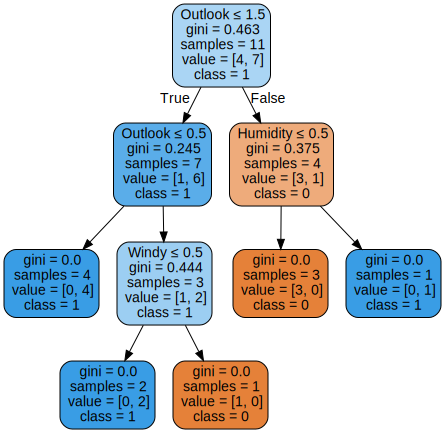

In [ ]:
graph

### **R scipt**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("rpart.plot") # ติดตั้ง rpart.plot
library("rpart")
library("rpart.plot")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpgI7uSY/downloaded_packages’



In [ ]:
%%R
weather <- read.table("WeatherNorm.csv", header = TRUE , sep = ",")


In [ ]:
%%R
weatherTree <- rpart(Class ~ Outlook + Temperature + Humidity + Windy,
      method="class",
      data=weather,
      control=rpart.control(minsplit=1),
      parms=list(split='information'))


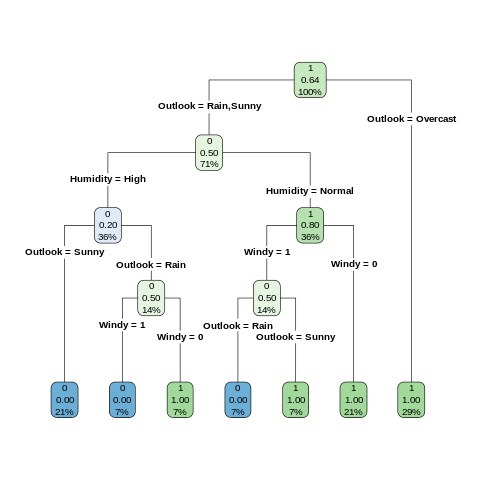

In [ ]:
%%R
rpart.plot(weatherTree, type = 4, , clip.right.labs=FALSE, varlen=0, faclen=0 )

In [ ]:
newdata <- data.frame(Outlook="rain",
  Temperature="cool",
  Humidity="high",
  Windy="true")

NameError: name 'newdata' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import json

# Read CSV file into DataFrame
physical_features = pd.read_csv('physical_property_features.csv')

# Load the amenities features JSON
with open('amenities_features.json', 'r') as f:
    amenities_features = pd.json_normalize(json.load(f))

# Merge the datasets on housecode
data = pd.merge(physical_features, amenities_features, on='housecode')

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(data.mean(), inplace=True)

# Convert categorical variables to numerical using Label Encoding or One-Hot Encoding
label_encoder = LabelEncoder()
categorical_columns = ['prefarea', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Label encode the categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Feature scaling (optional)
scaler = StandardScaler()
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Show the cleaned and processed data
print("First few rows of the processed data:")
print(data.head())

# Exploratory Data Analysis (EDA)
# Visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for some features vs. price
sns.pairplot(data, x_vars=['area', 'bedrooms', 'bathrooms'], y_vars='price', height=5, aspect=0.8)
plt.show()

# Box plots for categorical variables
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.title('Boxplot of Price by Furnishing Status')
plt.show()

# Model Development (Linear Regression)
# Separate features and target variable
X = data.drop(['price', 'housecode'], axis=1)  # Drop housecode and price for training
y = data['price']

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Display predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Comparison of actual and predicted values:")
print(results.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'physical_property_features.csv'